<a href="https://colab.research.google.com/github/pragneshrana/WorkSample/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
!pip install requests PyPDF2


In [49]:
import requests
import PyPDF2

def download_pdf(url, destination):
    response = requests.get(url)
    with open(destination, 'wb') as pdf_file:
        pdf_file.write(response.content)


In [50]:
def read_pdf_text(pdf_path):
    with open(pdf_path, 'rb') as pdf_file:
        pdf_reader = PyPDF2.PdfReader(pdf_file)
        text = ''
        for page_num in range(len(pdf_reader.pages)):
            page = pdf_reader.pages[page_num]
            text += page.extract_text()
        return text

In [51]:
pdf_url = "https://jep-asset.akamaized.net/cms/assets/jfs/investor-relations/financials/annual-reports/fy2022-2023/annual-report-2022-2023.pdf"
pdf_destination = "downloaded_file.pdf"

file = download_pdf(pdf_url, pdf_destination)

financial_text_data = read_pdf_text(pdf_destination)


In [1]:
import numpy as np
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.probability import FreqDist
import string
import random
import re
import matplotlib.pyplot as plt
from nltk.util import ngrams
from nltk import FreqDist
from langchain.prompts import ChatPromptTemplate

nltk.download('vader_lexicon')


ModuleNotFoundError: No module named 'langchain'

### Converting junk text to sentences

In [53]:
def extract_sentences(text):
    # Remove newlines
    text = text.replace('\n', ' ')

    # Extract sentences using regex
    sentences = re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s', text)

    return sentences

# Extract sentences
sentences = extract_sentences(financial_text_data)

# Store sentences in a list
sentences_list = [sentence.strip() for sentence in sentences]

# Print the list of sentences
print("\nList of Sentences:")
print(sentences_list)


List of Sentences:
['RELIANCE STRATEGIC   INVESTMENTS LIMITED     ANNUAL REPORT   2022-23 Reliance Strategic Investments Limited    CIN: U65990MH1999PLC120918     Registered Office: 9th Floor, Maker Chambers IV, 222 Nariman Point, Mumbai 400 021   Phone No. 022 – 22785000, E -mail: investor.relations@jiofinance.com ,Website:  www.jiofinancialservices.com        NOTICE     Notice  is hereby given that the Twenty -Fifth Annual General Meeting of the Members of  Reliance Strategic Investments Limited will be held on Wednes day, July 12 , 2023 at  11:30 a .m.', '(IST) through Video Conferencing (“ VC”) / Other Audio  Visual Means  (“OAVM ”), to transact the following business  at shorter notice :    ORDINARY BUSINESS :    1.', 'To consider and adopt  (a) the audited financial statement of the Company for the  financial year ende d March 31, 202 3 and the reports of the Board of Directors and  Auditors thereon ; and (b) the audited consolidated financial statement of the Company  for the f

In [54]:
# Download NLTK data (run this once)
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [55]:
# Tokenize the text into sentences and words
words = word_tokenize(financial_text_data)

In [56]:
# Remove stopwords and punctuation
stop_words = set(stopwords.words('english') + list(string.punctuation))
filtered_words = [word.lower() for word in words if word.lower() not in stop_words]


In [57]:
# Calculate word frequencies
freq_dist = FreqDist(filtered_words)

In [58]:
# Display the most common words
print("Most common words:")

print(freq_dist.most_common(20))


Most common words:
[('company', 791), ('financial', 690), ('limited', 365), ('year', 361), ('march', 331), ('investments', 308), ('2023', 301), ('assets', 282), ('statements', 250), ('board', 245), ('reliance', 240), ('31st', 236), ('’', 228), ('act', 222), ('directors', 205), ('strategic', 199), ('shares', 199), ('date', 181), ('equity', 174), ('audit', 172)]


In [59]:
# Analyze sentiment (example: positive, negative, neutral)
positive_words = ['strong', 'increase', 'surged', 'all-time high']
negative_words = ['concerns', 'expenses', 'slowdown']

In [60]:

positive_count = sum(freq_dist[word] for word in positive_words)
negative_count = sum(freq_dist[word] for word in negative_words)


In [61]:
if positive_count > negative_count:
    sentiment = "Positive"
elif positive_count < negative_count:
    sentiment = "Negative"
else:
    sentiment = "Neutral"

print("\nSentiment: {}".format(sentiment))


Sentiment: Negative


In [62]:
# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Analyze sentiment for each sentence
sentiment_scores = {sentence: sid.polarity_scores(sentence) for sentence in sentences}

# Sort sentences based on compound sentiment score
sorted_sentences = sorted(sentiment_scores.items(), key=lambda x: x[1]['compound'], reverse=True)

# Display the top positive and negative sentiments
top_positive = [sentence for sentence, scores in sorted_sentences[:3] if scores['compound'] > 0]
top_negative = [sentence for sentence, scores in sorted_sentences[-3:] if scores['compound'] < 0]

In [63]:


print("\nTop Positive Sentiments:")
for sentence in top_positive:
    print("-", sentence)

print("\nTop Negative Sentiments:")
for sentence in top_negative:
    print("-", sentence)


Top Positive Sentiments:
- The details of Board  meetings and attendance of Directors at these meetings and at the last Annual General Meeting  (“AGM”) are given below:      Reliance Strategic Investments Limited    CIN: U65990MH1999PLC12 0918     Registered Office: 9th Floor, Maker Chambers IV, 222 Nariman Point, Mumbai 400 021   Phone No. 022 – 22785000, E-mail: investor.relations@jiofinance.com ,Website:  www.jiofinancialservices.com    # Appointed w.e.f November 14, 2022   *Ceased to be an Independent Director w.e.f. March 30, 2023       Name of  the  Director  Board Meetings held during Financial Year 2022 -23 %  Attend ance   of  Direct or Last  AGM  held on  August  2, 2022   April  12,  2022  June  28, 2022  July  19,  2022  October  14, 2022  October  21, 2022  November  4, 2022  November  15, 2022  January  18, 2023  February   24, 2023  March  21,  2023     Kundapur  Vaman  Kamath# NA NA NA NA NA NA Yes Yes Yes Yes 100%  NA  Sethurama n  Kandasam y Yes Yes Yes Yes Yes Yes Y

In [64]:
# from nltk import ne_chunk, word_tokenize, pos_tag
# nltk.download('averaged_perceptron_tagger')
# nltk.download('maxent_ne_chunker')
# nltk.download('words')
## NER in NLTK is not performing good

In [65]:
!pip install spacy
!python -m spacy download en_core_web_sm


2024-01-20 21:13:52.243916: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-20 21:13:52.244020: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-20 21:13:52.248109: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-20 21:13:54.745132: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 35.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [66]:
import spacy

# Load the English language model
nlp = spacy.load("en_core_web_sm")



In [67]:
# Sample list of sentences
sentences = sentences_list

# Function to extract company names from a sentence using spaCy
def extract_company_names(sentence):
    doc = nlp(sentence)
    company_names = [ent.text for ent in doc.ents if ent.label_ == 'ORG']
    return company_names

# Extract company names from each sentence
all_company_names = [extract_company_names(sentence) for sentence in sentences]

# Flatten the list of lists into a single list
flat_company_names = [name for sublist in all_company_names for name in sublist]

print("Company Names:", flat_company_names)

Company Names: ['Reliance Strategic Investments Limited', 'CIN', '9th Floor', 'Video Conferencing', 'the Board of Directors', 'the Board of Directors', 'Interim Dividend', 'Interim Dividend', 'Non -Cumulative  Compulsorily Convertible Preference', 'the Board of Directors', 'Company', '9th Floor', 'Joint Statutory Auditor', 'the Reserve Bank of India', 'Statutory Auditors', 'Audit  Committee and Board of Directors', 'Lodha & Co', 'Chartered  Accountants', 'Company', 'the Board of Directors of the Company', 'Schedule IV', 'Section', 'Association of the Company', 'Company', 'Company', 'the Board of Directors', 'CIN', '9th Floor', 'Schedule IV', 'Section', 'Association of the Company', 'Company', 'Company', 'the Board of Directors', 'Company', 'Schedule IV', 'Articles of Association of the Company', 'Company', 'the Board of Directors', 'CIN', '9th Floor', 'Reserve Bank of India', 'RBI', 'Ms.', 'Company', 'Company', 'RBI', 'Qualification of Directors) Rules', 'Reserve Bank of India', 'RBI',

In [72]:
from nltk.util import ngrams

# Assuming you have a list of words
all_words = filtered_words

# Function to generate n-grams
def generate_ngrams(tokens, n):
    return list(ngrams(tokens, n))

# Generate bigrams
bigrams = generate_ngrams(all_words, 2)

# Generate trigrams
trigrams = generate_ngrams(all_words, 3)

# Print the bigrams and trigrams
print("Bigrams:", bigrams)
print("Trigrams:", trigrams)

Bigrams: [('reliance', 'strategic'), ('strategic', 'investments'), ('investments', 'limited'), ('limited', 'annual'), ('annual', 'report'), ('report', '2022-23'), ('2022-23', 'reliance'), ('reliance', 'strategic'), ('strategic', 'investments'), ('investments', 'limited'), ('limited', 'cin'), ('cin', 'u65990mh1999plc120918'), ('u65990mh1999plc120918', 'registered'), ('registered', 'office'), ('office', '9th'), ('9th', 'floor'), ('floor', 'maker'), ('maker', 'chambers'), ('chambers', 'iv'), ('iv', '222'), ('222', 'nariman'), ('nariman', 'point'), ('point', 'mumbai'), ('mumbai', '400'), ('400', '021'), ('021', 'phone'), ('phone', '022'), ('022', '–'), ('–', '22785000'), ('22785000', 'e'), ('e', '-mail'), ('-mail', 'investor.relations'), ('investor.relations', 'jiofinance.com'), ('jiofinance.com', 'website'), ('website', 'www.jiofinancialservices.com'), ('www.jiofinancialservices.com', 'notice'), ('notice', 'notice'), ('notice', 'hereby'), ('hereby', 'given'), ('given', 'twenty'), ('twenty

In [73]:
# Calculate frequencies of bigrams and trigrams
bigram_freq = FreqDist(bigrams)
trigram_freq = FreqDist(trigrams)

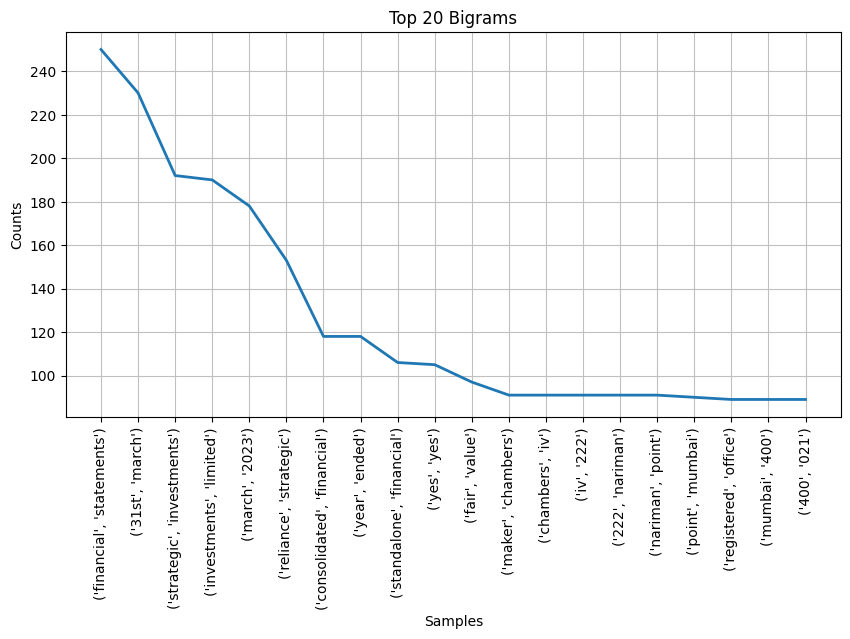

In [74]:
# Plot bigram frequencies
plt.figure(figsize=(10, 5))
bigram_freq.plot(20, title='Top 20 Bigrams', cumulative=False)
plt.show()


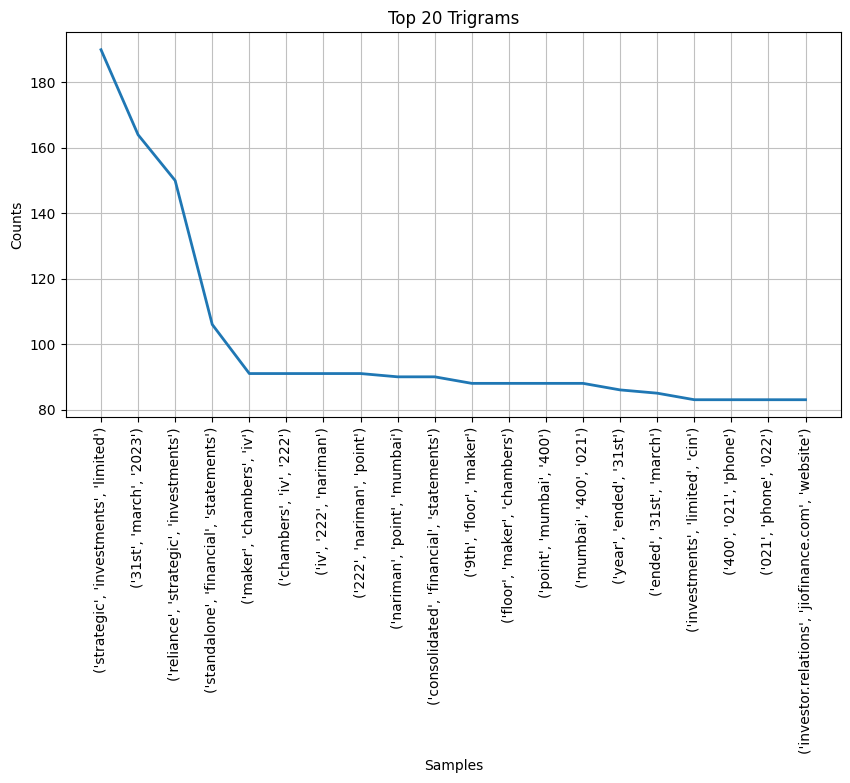

In [75]:
# Plot trigram frequencies
plt.figure(figsize=(10, 5))
trigram_freq.plot(20, title='Top 20 Trigrams', cumulative=False)
plt.show()

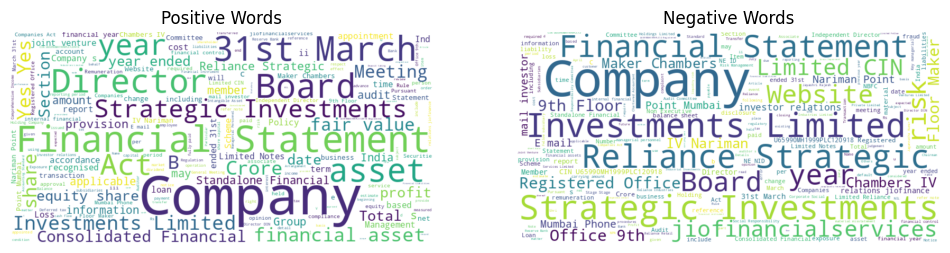

In [76]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer

# Sample list of sentences (replace with your actual sentences)
sentences = sentences_list

# Initialize Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

# Separate sentences into positive and negative
positive_sentences = [sentence for sentence in sentences if sia.polarity_scores(sentence)['compound'] >= 0]
negative_sentences = [sentence for sentence in sentences if sia.polarity_scores(sentence)['compound'] < 0]

# Combine positive and negative sentences into strings
positive_text = ' '.join(positive_sentences)
negative_text = ' '.join(negative_sentences)

# Generate Word Clouds
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Plot the Word Clouds
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Words')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Words')
plt.axis("off")

plt.show()


In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample list of sentences (replace with your actual sentences)
sentences = sentences_list

# Create the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the sentences
tfidf_matrix = tfidf_vectorizer.fit_transform(sentences)

# Get the feature names (words)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Convert the TF-IDF matrix to a dense array for better readability
dense_tfidf_matrix = tfidf_matrix.todense()

# Create a DataFrame for better visualization (optional)
import pandas as pd
df_tfidf = pd.DataFrame(dense_tfidf_matrix, columns=feature_names)

# # Display the TF-IDF matrix
# print("TF-IDF Matrix:")
# print(df_tfidf)

# # You can also explore the feature names and their corresponding indices
# print("\nFeature Names:")
# print(feature_names)